In [1]:
import pandas as pd
import pyodbc
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Initial Query

In [81]:
server = ''
database = ''
username = ''
password = ''

In [2]:
# example user data
user_id =  8286 # Sylvia, Project Manager - logged in user (from ProdSPLAuth user table)

# example date range
start_date = pd.to_datetime('2021-06-13', format='%Y-%m-%d') 
end_date = pd.to_datetime('2021-09-13', format='%Y-%m-%d') #current date


In [131]:
# Connect To DB to pull data
# Note the LEFT JOIN between the SureChemSummary and PreLogSamles Table

cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

project_id_query = ('SELECT     CAST(ProdSureVue.dbo.PreLogSamples.CollectFrom as datetime),'
                               ' ProdSureVue.dbo.PreLogSamples.Imported,'
                                'ProdSureVue.dbo.PreLogSamples.SampledBy, '
                               ' ProdSureVue.dbo.PreLogSamples.StationName, '
                               ' ProdSureVue.dbo.PreLogSamples.StationNo, '
                              '  ProdSureVue.dbo.PreLogSamples.SamplingPoint, '
                               ' ProdSureVue.dbo.SureChemSummary.Received, '
                               ' ProdSureVue.dbo.SureChemSummary.SampledDate,'
                               ' ProdSureVue.dbo.SureChemSummary.ReportDate, '
                              '  ProdSureVue.dbo.SureChemSummary.AnalysisDate, '
                               ' ProdSureVue.dbo.SureChemSummary.DaysToDropOff, '
                               ' ProdSureVue.dbo.SureChemSummary.TestStatus, '
                               ' ProdSureVue.dbo.SureChemSummary.SampleStatus, '
                               ' ProdSureVue.dbo.SureChemSummary.SID, '
                               ' ProdSureVue.dbo.SureChemSummary.SSID, '
                               ' ProdSureVue.dbo.SureChemSummary.WOStatus, '
                                ' ProdSureVue.dbo.SureChemSummary.WorkOrder, '
                                ' ProdSureVue.dbo.SureChemSummary.Method, '
                                ' ProdSureVue.dbo.SureChemSummary.TestCode '
                    
                            ' FROM ProdSPLAuth.dbo.user_project INNER JOIN '
                            ' ProdSPLAuth.dbo.projects ON ProdSPLAuth.dbo.user_project.project_id = ProdSPLAuth.dbo.projects.id '
                             ' INNER JOIN ProdSureVue.dbo.SampleLocations ON ProdSPLAuth.dbo.projects.unique_key = ProdSureVue.dbo.SampleLocations.LCProjectID '
                            ' INNER JOIN ProdSureVue.dbo.PreLogSamples ON ProdSureVue.dbo.SampleLocations.SLID = ProdSureVue.dbo.PreLogSamples.SLID '
                            ' LEFT JOIN ProdSureVue.dbo.SureChemSummary ON ProdSureVue.dbo.PreLogSamples.PreLogID = ProdSureVue.dbo.SureChemSummary.PreLogID '
                            f'WHERE        (ProdSPLAuth.dbo.user_project.user_id = {user_id})')
                    
project_id_table = pd.read_sql_query(project_id_query, cnxn)
project_id_table = project_id_table.rename(columns = {"" : 'CollectFrom'})

In [3]:
#Saving the data so I can use it whenever-
#project_id_table.to_csv(r'measurement_dash_data.csv')
project_id_table = pd.read_csv(r'measurement_dash_data.csv')


C:\Users\Preston\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8,9,10,12,13,16,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# We need to drop the test codes with "CHG"
# CHG test codes refer to additional charges such as cleaning and disposal that are irrelevant to the customer
project_id_table = project_id_table[~project_id_table['TestCode'].str.contains("CHG", na=False)]

In [5]:
project_id_table.head()

,Unnamed: 0,CollectFrom,Imported,SampledBy,StationName,StationNo,SamplingPoint,Received,SampledDate,ReportDate,AnalysisDate,DaysToDropOff,TestStatus,SampleStatus,SID,SSID,WOStatus,WorkOrder,Method,TestCode
0,0,2021-02-22 22:45:04.303,True,Vern Lund <vern.lund@williams.com>,FILLMORE FEE STATE 14-36D CRP,94834,NaN,2021-03-26 00:00:00.000,2021-03-22 15:44:00.000,2021-03-30 00:00:00.000,2021-03-26 10:18:51.000,4.0,C,C,6110.0,13908000.0,C,21030042.0,GPA-2261M,GC-C6GAS
1,1,2021-02-23 22:00:12.420,True,Vern Lund <vern.lund@williams.com>,CRESTON NOSE 7-2-18-92 CRP,94797,NaN,2021-03-26 00:00:00.000,2021-03-22 14:59:00.000,2021-03-30 00:00:00.000,2021-03-26 10:27:12.000,4.0,C,C,6111.0,13908001.0,C,21030042.0,GPA-2261M,GC-C6GAS
2,2,2021-02-22 22:14:44.990,True,Vern Lund <vern.lund@williams.com>,EAST ECHO SPRINGS 11-35-19-92 CRP,94619,NaN,2021-03-26 00:00:00.000,2021-03-22 15:14:00.000,2021-03-30 00:00:00.000,2021-03-26 10:50:37.000,4.0,C,C,6112.0,13908002.0,C,21030042.0,GPA-2261M,GC-C6GAS
3,3,2021-03-22 23:15:08.523,True,Josh Cozzens <joshua.cozzens@williams.com>,BARREL SPRINGS 22-3 CRP,94780,NaN,2021-03-26 00:00:00.000,2021-03-22 17:15:00.000,2021-03-30 00:00:00.000,2021-03-26 10:11:32.000,4.0,C,C,6113.0,13908003.0,C,21030042.0,GPA-2261M,GC-C6GAS
4,4,2021-03-22 18:09:53.570,True,Aaron Peterson <aaron.peterson@williams.com>,CHAIN LAKES I5 21 PAD CRP,25673A,NaN,2021-03-26 00:00:00.000,2021-03-22 12:09:00.000,2021-03-30 00:00:00.000,2021-03-26 10:02:50.000,4.0,C,C,6114.0,13908004.0,C,21030042.0,GPA-2261M,GC-C6GAS


In [6]:
print("Total Samples Imported Into SureChem: ", 
      project_id_table[project_id_table['Imported']==True]['Imported'].count())
print("Total Samples Not Imported: ", 
      project_id_table[project_id_table['Imported']==False]['Imported'].count())


Total Samples Imported Into SureChem:  40918
Total Samples Not Imported:  1568


##### The total number of samples not imported seems high - we might need to clean this up
 - To discus with Mark and Mothafar

In [7]:
"""
Here is the list of work order and sample statuses from the lab's LIMS system:
WO Status:
W = Work In Progress
H = Hold
DR = Deliver Report
C = Complete
GR = Generate report
H = On Hold
FR = Final Review
 

Sample Status:
W = Work in progress
C = Complete
H = On Hold
U = Unreportable
NA = No Results Available
RJ = Rejected
X = Deleted 
"""

"\nHere is the list of work order and sample statuses from the lab's LIMS system:\nWO Status:\nW = Work In Progress\nH = Hold\nDR = Deliver Report\nC = Complete\nGR = Generate report\nH = On Hold\nFR = Final Review\n \n\nSample Status:\nW = Work in progress\nC = Complete\nH = On Hold\nU = Unreportable\nNA = No Results Available\nRJ = Rejected\nX = Deleted \n"

In [8]:
print("Unique Test Status: ", list(project_id_table['TestStatus'].unique()))
print("Unique Sample Status: ", list(project_id_table['SampleStatus'].unique()))
print("Unique Workorder Status: ", list(project_id_table['WOStatus'].unique()))

Unique Test Status:  ['C', 'U', nan, 'W', 'RJ']
Unique Sample Status:  ['C', 'UN', 'UK', 'W', 'UC', nan]
Unique Workorder Status:  ['C', 'W', 'FR', 'GR', nan]


In [9]:
samples_with_errors = project_id_table[((project_id_table['SampleStatus']=="UK") |
                      (project_id_table['SampleStatus']=="UN") | 
                      (project_id_table['SampleStatus']=="UC"))]['SampleStatus'].count()

tests_with_errors = project_id_table[((project_id_table['TestStatus']=="U") |
                      (project_id_table['TestStatus']=="RJ"))]['SampleStatus'].count()

print('# of samples with errors: ', samples_with_errors)
print("# of tests with errors: ", tests_with_errors)

# of samples with errors:  17
# of tests with errors:  53


# Monthly # Of Tests/Samples/Work Orders Graph
In this example I'm assuming that the user has "tests" selected  
A similar code should work with grouping respective status codes for Samples and Work Orders

In [10]:
# create copy of the original dataset and drop na
monthly_tests_df = project_id_table[['Received', 'TestStatus']]
monthly_tests_df = monthly_tests_df.dropna()

# create columns for plotting
monthly_tests_df['Completed'] = monthly_tests_df['TestStatus'].str.count('C')
monthly_tests_df['In Progress'] = monthly_tests_df['TestStatus'].str.count('W')
monthly_tests_df['Errors'] = monthly_tests_df['TestStatus'].str.count('U|RJ')
monthly_tests_df['Date'] = pd.to_datetime(monthly_tests_df['Received'].values, infer_datetime_format=True) 

In [11]:
# User can select date ranges
start_date = pd.to_datetime('2021-06-13', format='%Y-%m-%d') 
end_date = pd.to_datetime('2021-09-23', format='%Y-%m-%d') #current date

# Grouping by month in this case 
# It would be nice to have an option to group by other intervals as well
monthly_tests_df = monthly_tests_df[monthly_tests_df['Date'] > start_date]
monthly_tests_df = monthly_tests_df.resample('M', on='Date')[['Completed', 'In Progress', 'Errors']].sum()


In [12]:
monthly_tests_df.head()

,Completed,In Progress,Errors
Date,,,
2021-06-30,1825,0,7
2021-07-31,2892,0,3
2021-08-31,3450,0,13
2021-09-30,1889,634,3


In [13]:
# Test/Sample/Work Order Tracker
print("Tile 1, Completed: ", monthly_tests_df['Completed'].sum())
print("Tile 2, In Progress: ", monthly_tests_df['In Progress'].sum())
print("Tile 3, Error: ", monthly_tests_df['Errors'].sum())

Tile 1, Completed:  10056
Tile 2, In Progress:  634
Tile 3, Error:  26


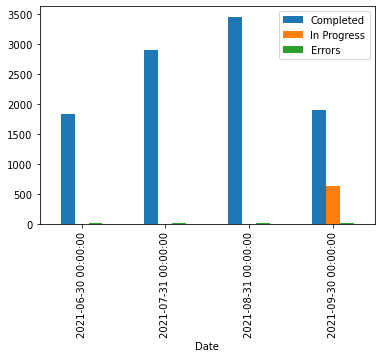

In [14]:
# Bar Graph - Monthly # Of Tests/Samples/Work Orders Graph
# the user should be able to click the key to veiw the specific status - I think we need something to scale up the errors 
ax = monthly_tests_df.plot.bar()

# Completed Test/Sample/Workorder List
I think that this should be filterable by tests, samples, and workorders as well  
In this example I'm assuming that the user has "tests" selected  

In [15]:
recent_completed_tests_table = project_id_table[['ReportDate', 'StationName', 'StationNo', 'Method']]
recent_completed_tests_table = recent_completed_tests_table.sort_values(by="ReportDate", ascending=False)

# only show the 5 latest tests done
recent_completed_tests_table = recent_completed_tests_table.iloc[:5]

In [16]:
recent_completed_tests_table

,ReportDate,StationName,StationNo,Method
19085,2021-09-23 00:00:00.000,Hawk 35 Fed 701h,60381244,GPA-2261M
19210,2021-09-23 00:00:00.000,Fox 30 Sc Fac #4h,60381062,GPA-2261M
19191,2021-09-23 00:00:00.000,Pure Gold A Fed 8 Battery,83293,GPA-2261M
19199,2021-09-23 00:00:00.000,Roo 22 St. 5 Check,14464C,GPA-2261M
19204,2021-09-23 00:00:00.000,Condor 32 St 703h,67282403,GPA-2261M


# Common Tests and Errors Charts

There may be no errors in the selected date range  
We'll need to switch from method name to test name (not test code) eventually, for now method should work

In [17]:
common_tests_table = project_id_table[['Received', 'Method', 'TestStatus']]
common_tests_table['Date'] = pd.to_datetime(common_tests_table['Received'].values, infer_datetime_format=True) 
common_tests_table = common_tests_table[common_tests_table['Date'] > start_date]
common_tests_table = common_tests_table.dropna()

<ipython-input-17-b7ba19ae1fb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_tests_table['Date'] = pd.to_datetime(common_tests_table['Received'].values, infer_datetime_format=True)


In [18]:
top_methods_table = common_tests_table.groupby(by="Method").count()

#Lets only take the top 5 most done tests
top_methods_table = top_methods_table.nlargest(5, 'Received')

In [19]:
top_methods = top_methods_table.index.values
num_methods = top_methods_table['Received'].values

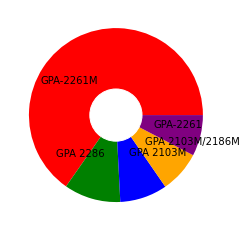

In [20]:
# Donut Plot for most done tests

# Create a circle at the center of the plot
top_method_chart = plt.Circle( (0,0), 0.3, color='white')

# Create Chart
plt.pie(list(num_methods), labels=list(top_methods), colors=['red','green','blue', 'orange', 'purple'], labeldistance=0.45)
p = plt.gcf()
p.gca().add_artist(top_method_chart)
plt.show()

In [21]:
top_errors_table =  common_tests_table[((common_tests_table['TestStatus']=="U") | (common_tests_table['TestStatus']=="RJ"))][["Method", "TestStatus"]]
top_errors_table = top_errors_table.groupby(by="Method").count()

In [22]:
top_errors_methods = top_errors_table['TestStatus'].index.values
num_errors = top_errors_table['TestStatus'].values

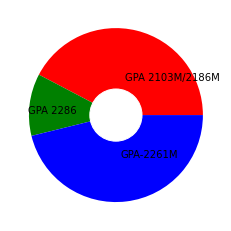

In [23]:
# Donut Plot for tests with the most errors

# Create a circle at the center of the plot
errors_chart = plt.Circle( (0,0), 0.3, color='white')

# Create Chart, in this case  there were only three metthods with errors
plt.pie(list(num_errors), labels=list(top_errors_methods), colors=['red','green','blue'], labeldistance=0.45)
p = plt.gcf()
p.gca().add_artist(errors_chart)
plt.show()

# Location Search/Summary Table
The filterable table at the bottom of the dashboard

Eventually we'll need to update this table with scheduler data for test/method

In [24]:
# User can select date ranges
start_date = pd.to_datetime('2021-08-13', format='%Y-%m-%d') 
end_date = pd.to_datetime('2021-09-23', format='%Y-%m-%d') #current date

In [110]:
locations_table = project_id_table[['CollectFrom', 'ReportDate', 'StationName', 'StationNo', 'SamplingPoint', 'Method', "TestStatus", "SampleStatus", "SID", "WorkOrder"]]

# Filter Over Date Range (start date to current date)
locations_table['CollectDate'] = pd.to_datetime(locations_table['CollectFrom'].values, infer_datetime_format=True) 
locations_table = locations_table[(locations_table['CollectDate'] > start_date) & (locations_table['CollectDate'] < end_date)]
locations_table = locations_table.sort_values(by="CollectDate", ascending=False)

# Set Status For Collected but not dropped off samples
# In this case I'll use "S" for Sampled
values = {"TestStatus": "S", "SampleStatus": "S"}
locations_table = locations_table.fillna(value=values)

#Check sample statuses
locations_table['InProgress'] = locations_table['SampleStatus'].str.count("W")
locations_table['Complete'] = locations_table['SampleStatus'].str.count("C")
locations_table['Sampled'] = locations_table['SampleStatus'].str.count("S")
locations_table['Errors'] = locations_table['SampleStatus'].str.count("U|RJ")

# Im not sure what the best way to ge the # of tests is - 
# Basically I want to show the individual samples in the table and have them grouped by test
# It makes it tricky since we need to deal with samples that have been sampled, but have not been assigned an SID yet

sampled_only_table = locations_table[locations_table['SampleStatus']=="S"]
dropped_off_table = locations_table[locations_table['SampleStatus']!="S"]

sampled_only_table['# of Tests'] = "-"

<ipython-input-110-f63520cac3b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations_table['CollectDate'] = pd.to_datetime(locations_table['CollectFrom'].values, infer_datetime_format=True)
<ipython-input-110-f63520cac3b6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_only_table['# of Tests'] = "-"


In [111]:
# I sum the the columns based on SID to get the totals for InProgress, Complete, Sampled, and Errors
dropped_off_table_tests = dropped_off_table.groupby(by=["SID"]).sum()

# create # of tests counter
dropped_off_table_tests["# of Tests"] = dropped_off_table_tests.iloc[:,1:3].sum(axis=1)

# I only take the first values for this table to get unique SID info since we don't be showing the method
dropped_off_table_grouped = dropped_off_table.groupby(by=["SID"]).first()


In [112]:
# don't use counters from dropped off table since they are not correct
dropped_off_table_grouped = dropped_off_table_grouped.drop(['InProgress', "Complete", "Sampled", "Errors"], axis=1)

# Merge table with counters to table with Unique SID info
dropped_off_table_grouped = pd.concat([dropped_off_table_grouped, dropped_off_table_tests[["# of Tests", "Complete", "Sampled", "InProgress", "Errors"]]], axis=1)

dropped_off_table_grouped = dropped_off_table_grouped.reset_index()

In [113]:
# Combine sampled table with updated dropped off table
summary_table_results =  pd.concat([dropped_off_table_grouped, sampled_only_table])

# Values For Table - technically sample status should be re-calculated from complete, sampled and in progress columns
summary_table_results = summary_table_results[["CollectFrom", "StationName", "StationNo", "SamplingPoint" , "SampleStatus", "Errors",  "# of Tests", "ReportDate"]]

In [114]:
# Sort By Newest First
summary_table_results = summary_table_results.sort_values(by="CollectFrom", ascending=False)

# Show Final Table
summary_table_results[["StationName", "StationNo", "SamplingPoint" , "SampleStatus", "Errors",  "# of Tests", "ReportDate"]].head(10)

,StationName,StationNo,SamplingPoint,SampleStatus,Errors,# of Tests,ReportDate
28818,LATHAM DRAW 29-40D CRP,94607,NaN,S,0,-,NaN
40974,LATHAM DRAW 29-100 RUN 2 CRP,94790,NaN,S,0,-,NaN
28652,BANDIT CS ENTERPRISE,14108967,NaN,S,0,-,NaN
36011,FMP USA NEAL 2-60 CRP,94687,NaN,S,0,-,NaN
43414,Teddy 1 #1H,46821701,NaN,S,0,-,NaN
25827,St Galileo North Fc,59589006,NaN,S,0,-,NaN
40610,BOA LGL DISC,14115666,upstream,S,0,-,NaN
38316,Frazier 34 Sc 503h,60381104,NaN,S,0,-,NaN
32688,Navarro Mid Sales 8,EHWCT09370,NaN,S,0,-,NaN
42412,Frazier 34 Sc 401h Gl,60384110,NaN,S,0,-,NaN
